In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def fourierMat(n):
    e = complex(math.cos(2*math.pi / n), - math.sin(2 * math.pi / n)) 
    matrix = np.ones((n, n), dtype=complex)
    for i in range(n):
        for j in range(n):
            matrix[i,j] = np.power(e, (i * j))
    return matrix

In [5]:
def myDFT(x):
    return fourierMat(x.shape[0]) @ x

In [6]:
a = fourierMat(2)
print(a)

[[ 1. +0.00000000e+00j  1. +0.00000000e+00j]
 [ 1. +0.00000000e+00j -1. -1.22464680e-16j]]


# DFT

In [8]:
T = np.array([2, 3, 4, 5])

In [9]:
myDFT(T)

array([ 14. +0.00000000e+00j,  -2. +2.00000000e+00j,  -2. -1.22464680e-15j,
        -2. -2.00000000e+00j])

In [10]:
r = np.fft.fft(T)
print(r)

[ 14.+0.j  -2.+2.j  -2.+0.j  -2.-2.j]


# IDFT

In [11]:
def myIDFT(y):
    fni = np.conj(fourierMat(y.shape[0])) / y.shape[0]
    return fni @ y

In [12]:
def myIDFT2(y):
    dft = myDFT(np.conj(y))
    return np.conj(dft) / y.shape[0]    

In [13]:
myIDFT(r)

array([ 2. +0.00000000e+00j,  3. +6.12323400e-17j,  4. -1.22464680e-16j,
        5. -5.51091060e-16j])

In [14]:
myIDFT2(r)

array([ 2. -0.00000000e+00j,  3. +6.12323400e-17j,  4. -1.22464680e-16j,
        5. -5.51091060e-16j])

In [15]:
np.fft.ifft(r)

array([ 2.+0.j,  3.+0.j,  4.+0.j,  5.+0.j])

# FFT

In [16]:
def fourierDiag(n):
    e = complex(math.cos(2*math.pi / n), - math.sin(2 * math.pi / n))
    return np.array([np.power(e, i) for i in range(n//2)], dtype=complex)

In [17]:
def myFFT(x):
    n = x.shape[0]
    if n == 2:
        return myDFT(x)

    else:
        even = x[::2]
        odd = x[1::2]
        d = fourierDiag(n)
        
        fftEven = myFFT(even)
        fftOdd = myFFT(odd)
        return np.append(fftEven + (d * fftOdd), fftEven - (d * fftOdd))

In [18]:
myFFT(T)

array([ 14.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j])

In [19]:
myDFT(T)

array([ 14. +0.00000000e+00j,  -2. +2.00000000e+00j,  -2. -1.22464680e-15j,
        -2. -2.00000000e+00j])

# TIME

In [20]:
import time

In [33]:
x = np.random.rand(1024)

In [51]:
start = time.time()
np.fft.fft(x)
end = time.time()
print(end - start)

0.009075164794921875


In [58]:
start = time.time()
myFFT(x)
end = time.time()
print(end - start)

0.14037084579467773


In [59]:
start = time.time()
myDFT(x)
end = time.time()
print(end - start)

12.411260604858398


# SIGNALS

In [63]:
def sinSumSignal(signal_data):
    return lambda x: sum([math.sin(i * x) for i in signal_data])

In [64]:
freq = [1, 5, 25, 50, 100]
sig_sample = sinSumSignal(freq)
sig = np.array(list(map(sig_sample, np.linspace(0, 8 * math.pi, 2048))))

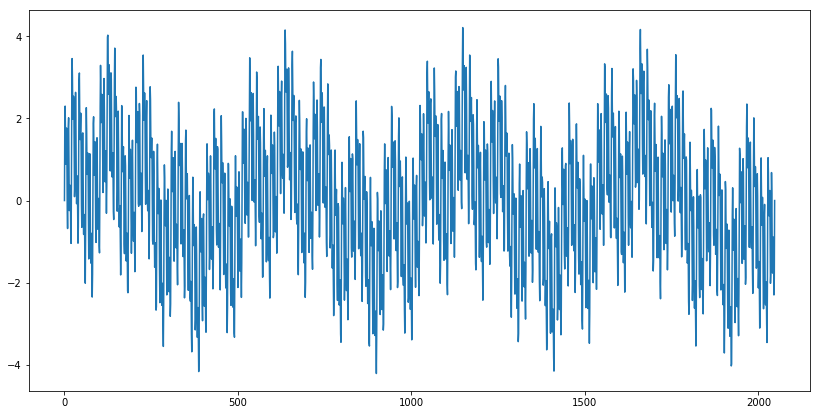

In [89]:
plt.figure(figsize=(14,7)) 
plt.plot(sig)
plt.show()

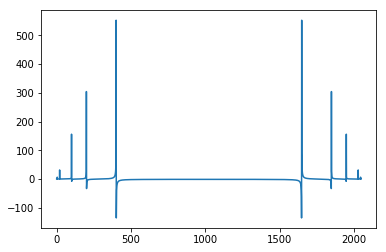

In [69]:
plt.plot(np.real(np.fft.fft(sig)))
plt.show()

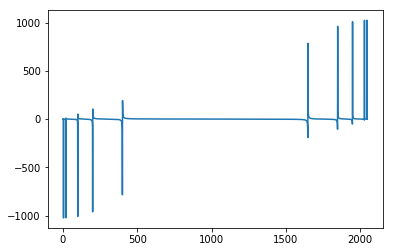

In [84]:
plt.plot(np.imag(np.fft.fft(sig)))
plt.show()

In [107]:
def sinPeriodSig(signal_data, signal_range):
    breaks = np.linspace(*signal_range, len(signal_data) + 1)[1:]
    def signal(x):
        for i, signal_break in enumerate(breaks):
            if x < signal_break:
                return math.sin(signal_data[i] * x)
        return math.sin(signal_data[-1] * x)
        
    return signal

In [109]:
sig_sample = sinPeriodSig(freq, [0,26])
periodSig = np.array(list(map(sig_sample, np.linspace(0, 8 * math.pi, 2048))))

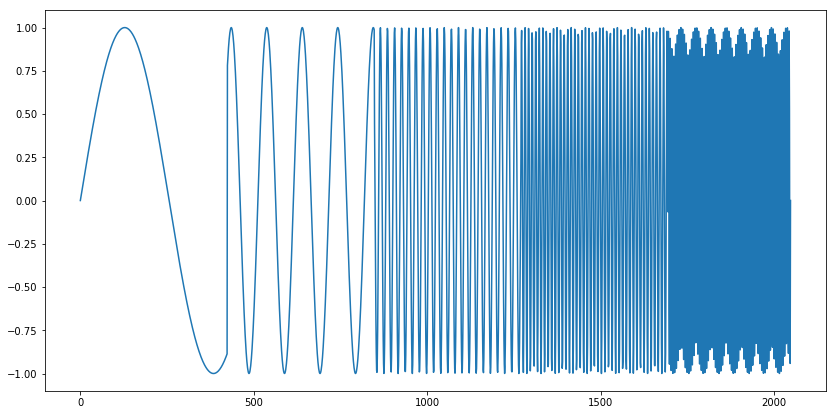

In [110]:
plt.figure(figsize=(14,7)) 
plt.plot(periodSig)
plt.show()

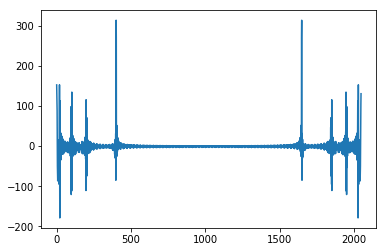

In [95]:
plt.plot(np.real(np.fft.fft(periodSig)))
plt.show()

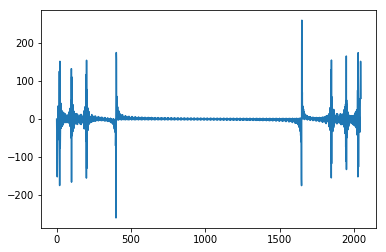

In [96]:
plt.plot(np.imag(np.fft.fft(periodSig)))
plt.show()